In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from skimage.io import imshow
from datetime import datetime
import random
#import vgg16_v1

import utils

testNUM = 3
imageNUM = 18
image_WH = 256

path_test = os.path.join('..','post_data')
img = np.ndarray(shape=(testNUM,image_WH,image_WH,3), dtype=float)

C:\Users\HSJung\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def image_print(fig, i, img, name):
    #add column for print input images
    ax = fig.add_subplot(1, imageNUM, 1 + i, xticks=[], yticks=[])
    #add title that is probable name of type
    ax.set_title(name)
    plt.imshow(img)

In [3]:
images = os.listdir(path_test)
path = random.sample(images,3)

i = 0
# valid data set
for file in path:
    img[i] = utils.load_image(os.path.join(path_test,file),image_WH)
    print(file,"is selected")
    i += 1
batch = img

capture one 09857_002_05.jpg is selected
capture one 09639_002_03.jpg is selected
02_.JPG is selected


C:\Users\HSJung\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


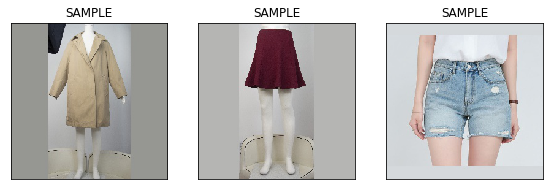

In [4]:
#print sample data
fig = plt.figure(figsize=(60,testNUM))
for i in range(testNUM):
    image_print(fig,i,img[i],"SAMPLE")

In [ ]:
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.8)))) as sess:
        print('program is started')
        
        #Load meta graph
        saver = tf.train.import_meta_graph(os.path.join('checkpoint','TL-model-65884.meta'))
        
        #Load weights
        saver.restore(sess, tf.train.latest_checkpoint(os.path.join('checkpoint')))
        #make graph
        graph = tf.get_default_graph()
        
        # If you don't know name of variables, remove '''''' 
        '''
        for op in graph.get_operations():
            print(op.name)
        '''
        
        #Fix input and ouput
        inputs = graph.get_tensor_by_name("images:0")
        prob_ = graph.get_tensor_by_name("content_vgg/fc8/probability:0")
        
        feed_dict = {inputs: batch}

        print(datetime.now(),' Running starts!')
        prob = sess.run(prob_, feed_dict=feed_dict)
        print(datetime.now(),' Running finished!')
        
        #Show test image and which label AI decided
        fig = plt.figure(figsize=(60,testNUM))
        for i in range(testNUM):
            pred = np.argsort(prob[i])[::-1]
            print(pred)
            image_print(fig, i, img[i], (pred[0],prob[i][pred[0]]))

program is started
INFO:tensorflow:Restoring parameters from checkpoint\TL-model-65884
2018-09-27 15:18:24.036597  Running starts!
